MBA EM CIÊNCIA DE DADOS - Turma: 7 <br>
Disciplina: Modelos de Machine Learning <br>
Professor: Caio Ponte

---
Nome: Amanda Ellen Gomes Oliveira <br>
Matricula: 2327983




## Definição do Problema

1. **Contexto dos Dados:**
Este estudo utiliza dados de ocorrências policiais da cidade de Los Angeles, fornecidos pelo Departamento de Polícia de Los Angeles (LAPD). O dataset contém registros detalhados sobre crimes reportados, incluindo tipo de crime, localização, data e horário da ocorrência.

2.  **Problema a Ser Resolvido:**
O objetivo desta análise é identificar padrões de criminalidade e desenvolver um modelo de classificação de crimes que possa prever a categoria do crime com base em fatores como localização, horário e características da ocorrência. Com isso, busca-se auxiliar na tomada de decisões estratégicas para segurança pública, permitindo melhor distribuição de recursos e ações preventivas.

3. **Origem dos Dados:**
Os dados foram obtidos a partir do site oficial do governo dos Estados Unidos, Data.gov, no formato original de arquivo CSV, contendo mais de 1 milhão de registros de crimes desde 2020 até o presente.

### Dataframe

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
!gdown 1oza4g3hQG2tJowFTuFLgp1l5RUecIS8S

Downloading...
From (original): https://drive.google.com/uc?id=1oza4g3hQG2tJowFTuFLgp1l5RUecIS8S
From (redirected): https://drive.google.com/uc?id=1oza4g3hQG2tJowFTuFLgp1l5RUecIS8S&confirm=t&uuid=73494bc6-d16d-4c54-84ac-ea0a2956c577
To: /content/Crime_Data_from_2020_to_Present_20250306.csv
100% 256M/256M [00:03<00:00, 81.8MB/s]


In [57]:
df = pd.read_csv('Crime_Data_from_2020_to_Present_20250306.csv')

In [58]:
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
5,200209713,05/03/2020 12:00:00 AM,05/02/2020 12:00:00 AM,1800,2,Rampart,245,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 W 4TH ST,NaN,34.0642,-118.2771
6,200200759,07/07/2020 12:00:00 AM,07/07/2020 12:00:00 AM,1340,2,Rampart,265,1,648,ARSON,...,IC,Invest Cont,648.0,998.0,NaN,NaN,JAMES M WOOD,ALVARADO,34.0536,-118.2788
7,201308739,03/27/2020 12:00:00 AM,03/27/2020 12:00:00 AM,1210,13,Newton,1333,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3200 S SAN PEDRO ST,NaN,34.0170,-118.2643
8,201112065,07/31/2020 12:00:00 AM,07/30/2020 12:00:00 AM,2030,11,Northeast,1161,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,NaN,NaN,NaN,KENMORE ST,FOUNTAIN,34.0953,-118.2974
9,200121929,12/04/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2300,1,Central,105,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,400 SOLANO AV,NaN,34.0710,-118.2302


In [59]:
df.shape

(1005104, 28)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005104 entries, 0 to 1005103
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005104 non-null  int64  
 1   Date Rptd       1005104 non-null  object 
 2   DATE OCC        1005104 non-null  object 
 3   TIME OCC        1005104 non-null  int64  
 4   AREA            1005104 non-null  int64  
 5   AREA NAME       1005104 non-null  object 
 6   Rpt Dist No     1005104 non-null  int64  
 7   Part 1-2        1005104 non-null  int64  
 8   Crm Cd          1005104 non-null  int64  
 9   Crm Cd Desc     1005104 non-null  object 
 10  Mocodes         853380 non-null   object 
 11  Vict Age        1005104 non-null  int64  
 12  Vict Sex        860353 non-null   object 
 13  Vict Descent    860341 non-null   object 
 14  Premis Cd       1005088 non-null  float64
 15  Premis Desc     1004516 non-null  object 
 16  Weapon Used Cd  327244 non-null   fl

In [61]:
nan_por_coluna = df.isna().sum()
nan_por_coluna

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


In [62]:
df['Mocodes']

,Mocodes
0,NaN
1,1822 1402 0344
2,0344 1251
3,0325 1501
4,NaN
...,...
1005099,NaN
1005100,0344
1005101,NaN
1005102,NaN


In [63]:
df['Vict Age'].value_counts()


,count
Vict Age,
0,269328
30,22287
35,21832
31,21420
29,21344
...,...
98,71
-2,28
-3,5


In [64]:
df['Vict Descent'].value_counts() # Tem essa info sim, no dicionario de dados

,count
Vict Descent,
H,296406
W,201447
B,135818
X,106685
O,78002
A,21339
K,5991
F,4838
C,4631


In [65]:
df['Mocodes'].value_counts()

,count
Mocodes,
0344,42200
0329,21632
1822 0344,14250
0325,10297
0344 1822,9842
...,...
0913 0344 0324 1803,1
0344 0416 0432 0913 1309 1814 2000,1
0325 0334 0209 0945,1


In [66]:
df['Status'].value_counts()

,count
Status,
IC,804175
AO,109057
AA,86755
JA,3248
JO,1862
CC,6


In [67]:
df['Status Desc'].value_counts()

,count
Status Desc,
Invest Cont,804175
Adult Other,109057
Adult Arrest,86755
Juv Arrest,3248
Juv Other,1862
UNK,7


In [68]:
df['Crm Cd 1'].value_counts()

,count
Crm Cd 1,
510.0,115214
624.0,75175
330.0,63569
354.0,62552
740.0,61196
...,...
904.0,5
430.0,4
445.0,4


In [69]:
df['Crm Cd'].value_counts()

,count
Crm Cd,
510,115230
624,74840
330,63517
354,62539
740,61092
...,...
904,5
906,4
445,4


## Criando novas colunas

In [70]:
df.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


In [71]:
df['AREA'] = df['AREA'].astype(int)
df['Crm Cd'] = df['Crm Cd'].astype(int)

In [72]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [73]:
# Removendo o horário e mantendo só a data
df['DATE OCC'] = df['DATE OCC'].dt.date

In [74]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [75]:
# Criar novas colunas para análise
df['ANO'] = df['DATE OCC'].dt.year
df['MES'] = df['DATE OCC'].dt.month
df['DIA_SEMANA'] = df['DATE OCC'].dt.day_name()

### contagem geral de crimes

In [76]:
crime_counts = df['Crm Cd'].value_counts()
print(crime_counts)

Crm Cd
510    115230
624     74840
330     63517
354     62539
740     61092
        ...  
904         5
906         4
445         4
926         1
453         1
Name: count, Length: 140, dtype: int64


In [77]:
min_occurrences = 10
rare_crimes = crime_counts[crime_counts < min_occurrences]
print("Crimes com menos de", min_occurrences, "ocorrências:\n", rare_crimes)

Crimes com menos de 10 ocorrências:
 Crm Cd
840    9
113    9
446    8
942    8
924    7
948    7
452    7
485    6
475    6
349    6
432    6
884    6
830    6
904    5
906    4
445    4
926    1
453    1
Name: count, dtype: int64


In [78]:
#  Agrupar as classes minoritárias
df['Crm Cd Grouped'] = df['Crm Cd'].replace(rare_crimes.index, 0)

# Verificar a nova distribuição
crime_counts_grouped = df['Crm Cd Grouped'].value_counts()
print("Contagem de crimes após agrupamento:\n", crime_counts_grouped)

Contagem de crimes após agrupamento:
 Crm Cd Grouped
510    115230
624     74840
330     63517
354     62539
740     61092
        ...  
880        13
865        12
347        12
436        11
473        10
Name: count, Length: 123, dtype: int64


### Crimes por ano

In [79]:
# Contar crimes por ano e mês
crimes_por_ano = df['ANO'].value_counts().sort_index()
crimes_por_mes = df['MES'].value_counts().sort_index()

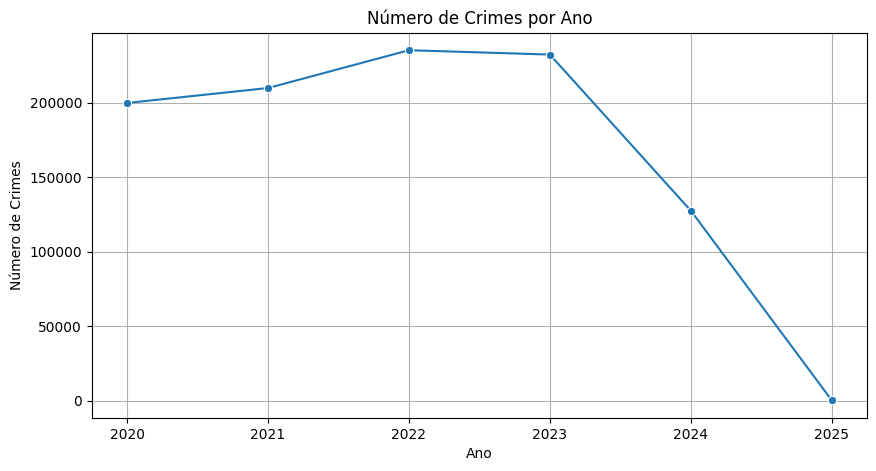

In [80]:
# evolução dos crimes ao longo dos anos
plt.figure(figsize=(10,5))
sns.lineplot(x=crimes_por_ano.index, y=crimes_por_ano.values, marker="o", linestyle="-")
plt.title("Número de Crimes por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de Crimes")
plt.grid(True)
plt.show()

### Crimes por mês

<ipython-input-81-7741ed4aac32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimes_por_mes.index, y=crimes_por_mes.values, palette="gnuplot")


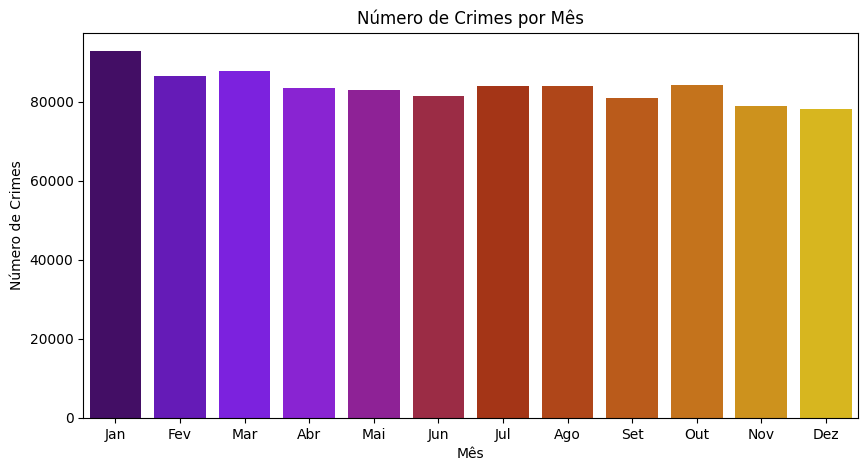

In [81]:
# Crimes por mês
plt.figure(figsize=(10,5))
sns.barplot(x=crimes_por_mes.index, y=crimes_por_mes.values, palette="gnuplot")
plt.title("Número de Crimes por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Crimes")
plt.xticks(range(12), ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])
plt.show()

In [82]:
# Calcular estatísticas
media_crimes = crimes_por_mes.mean()
desvio_padrao_crimes = crimes_por_mes.std()
mediana_crimes = crimes_por_mes.median()


print(f"Média de crimes por mês: {media_crimes:.2f}")
print(f"Desvio padrão de crimes por mês: {desvio_padrao_crimes:.2f}")
print(f"Mediana de crimes por mês: {mediana_crimes}")

Média de crimes por mês: 83758.67
Desvio padrão de crimes por mês: 3959.94
Mediana de crimes por mês: 83683.0


### crimes por dia da semana

In [83]:
# Contar crimes por dia da semana
crimes_dia_semana = df['DIA_SEMANA'].value_counts()
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<ipython-input-84-76f0a3319ab9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimes_dia_semana.index, y=crimes_dia_semana.values, order=dias_ordenados, palette="coolwarm")


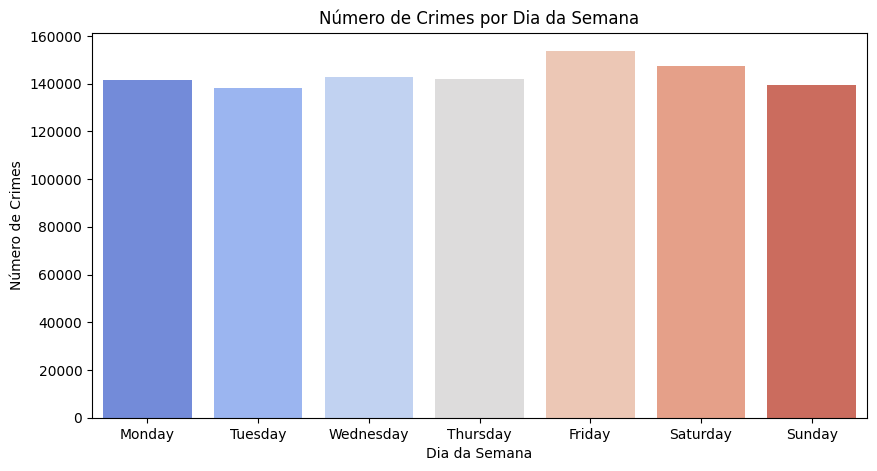

In [84]:
plt.figure(figsize=(10,5))
sns.barplot(x=crimes_dia_semana.index, y=crimes_dia_semana.values, order=dias_ordenados, palette="coolwarm")
plt.title("Número de Crimes por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Crimes")
plt.show()

### categorização do periodo do dia

In [85]:
# Converter a coluna de hora para string para garantir o formato correto
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

In [86]:
# Converter para formato de hora
df['HORA_FORMATADA'] = pd.to_datetime(df['TIME OCC'], format='%H%M').dt.time

In [87]:
print(df[['TIME OCC', 'HORA_FORMATADA']].head())

  TIME OCC HORA_FORMATADA
0     2130       21:30:00
1     1800       18:00:00
2     1700       17:00:00
3     2037       20:37:00
4     0630       06:30:00


In [88]:
def categorizar_periodo(hora):
    if 0 <= hora < 6:
        return "Madrugada"
    elif 6 <= hora < 12:
        return "Manhã"
    elif 12 <= hora < 18:
        return "Tarde"
    else:
        return "Noite"

In [89]:
# Aplicar a função na coluna de hora
df['PERIODO_DIA'] = df['HORA_FORMATADA'].apply(lambda x: categorizar_periodo(x.hour))

In [90]:
# Visualizar os primeiros resultados
print(df[['HORA_FORMATADA', 'PERIODO_DIA']].head())

  HORA_FORMATADA PERIODO_DIA
0       21:30:00       Noite
1       18:00:00       Noite
2       17:00:00       Tarde
3       20:37:00       Noite
4       06:30:00       Manhã


### Número de crimes por hora do dia

In [91]:
# Certificar que a coluna de hora está no formato datetime.time
df['hora'] = pd.to_datetime(df['HORA_FORMATADA'], format='%H:%M:%S').dt.hour

In [92]:
crimes_por_hora = df['hora'].value_counts().sort_index()

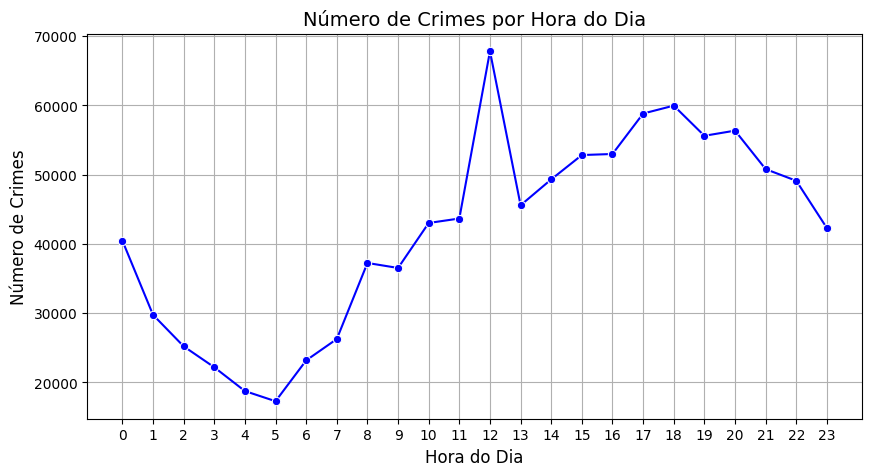

In [93]:
# Criando o gráfico de linha
plt.figure(figsize=(10,5))
sns.lineplot(x=crimes_por_hora.index, y=crimes_por_hora.values, marker="o", linestyle="-", color="b")

# Personalização do gráfico
plt.title("Número de Crimes por Hora do Dia", fontsize=14)
plt.xlabel("Hora do Dia", fontsize=12)
plt.ylabel("Número de Crimes", fontsize=12)
plt.xticks(range(24))  # Garante que todas as horas sejam exibidas
plt.grid(True)
plt.show()

### Heatmap de Crimes por Hora e Dia da Semana

In [94]:
# Criar tabela cruzada com contagem de crimes por dia da semana e hora
heatmap_data = df.pivot_table(index='DIA_SEMANA', columns='hora', aggfunc='size', fill_value=0)

In [95]:
# Ordenar os dias da semana para ficarem na ordem correta
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(dias_ordenados)

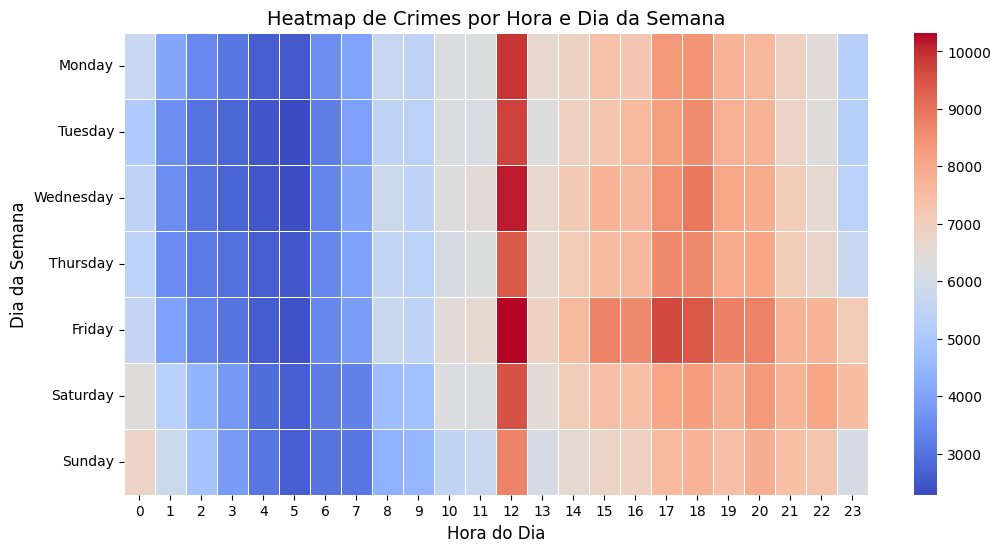

In [96]:
# Criando o heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5, annot=False)

# Personalização do gráfico
plt.title("Heatmap de Crimes por Hora e Dia da Semana", fontsize=14)
plt.xlabel("Hora do Dia", fontsize=12)
plt.ylabel("Dia da Semana", fontsize=12)
plt.xticks(rotation=0)
plt.show()

### Crimes mais cometidos

In [97]:
top_crimes = df['Crm Cd Desc'].value_counts().head(15)

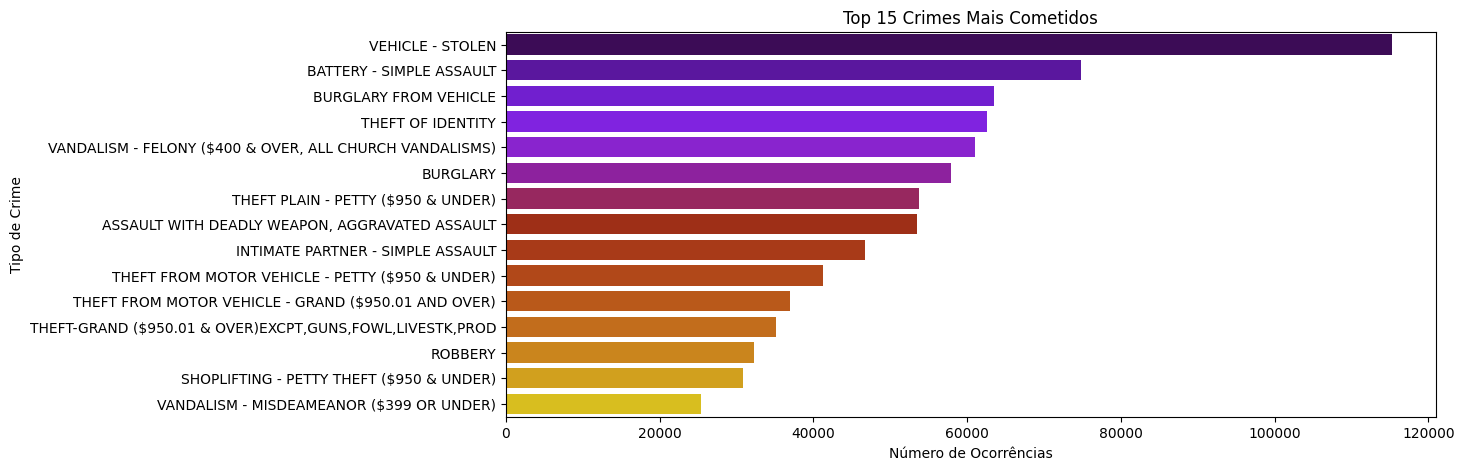

In [98]:
plt.figure(figsize=(12,5))
sns.barplot(x=top_crimes.values, y=top_crimes.index,hue=top_crimes.index, palette="gnuplot")

plt.title("Top 15 Crimes Mais Cometidos")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Tipo de Crime")
plt.show()

### Evolução dos Crimes ao Longo do Tempo

In [99]:
# Criar uma coluna "Ano-Mês" para agrupar os crimes mensalmente
df['ano_mes'] = df['DATE OCC'].dt.to_period('M')

In [100]:
crimes_por_mes = df['ano_mes'].value_counts().sort_index()

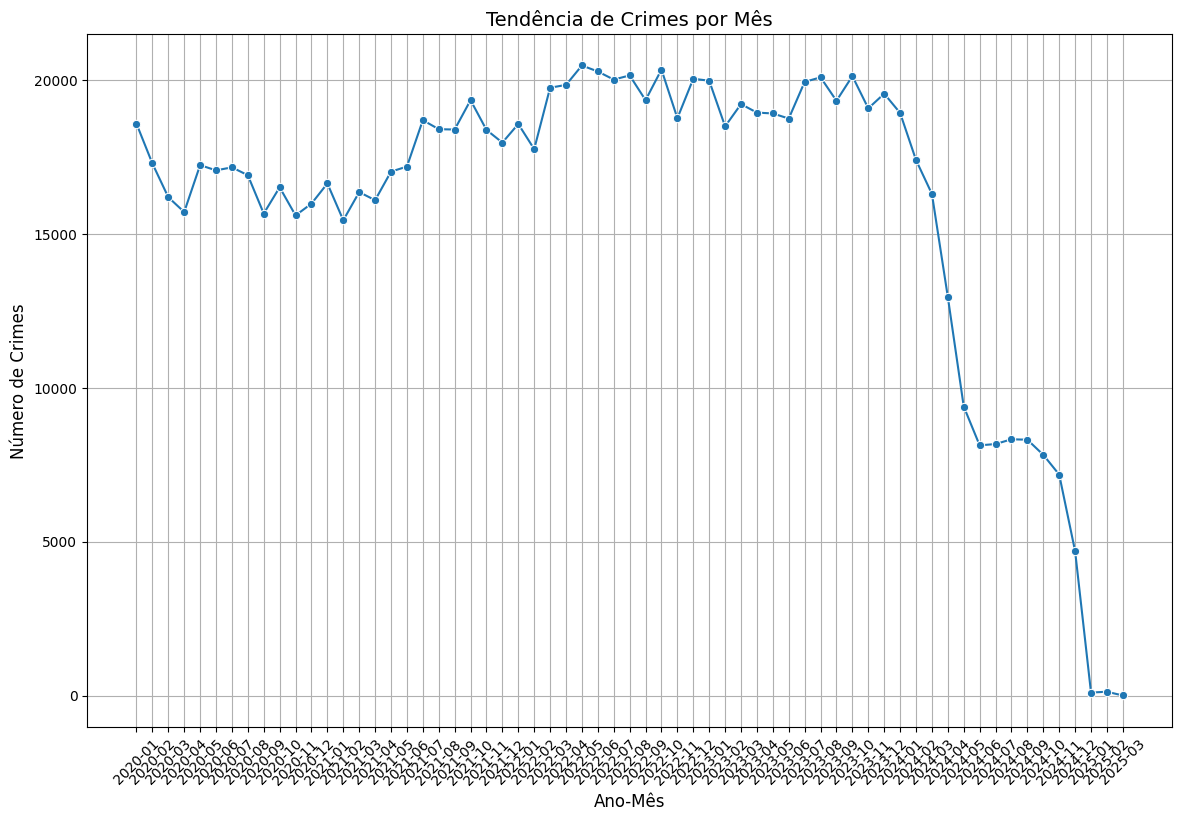

In [101]:
plt.figure(figsize=(14,9))
sns.lineplot(x=crimes_por_mes.index.astype(str), y=crimes_por_mes.values, marker="o")

plt.title("Tendência de Crimes por Mês", fontsize=14)
plt.xlabel("Ano-Mês", fontsize=12)
plt.ylabel("Número de Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Distribuição da Idade das Vítimas

In [102]:
# remover idades iguais a 0
filtered_df = df[df['Vict Age'] != 0]

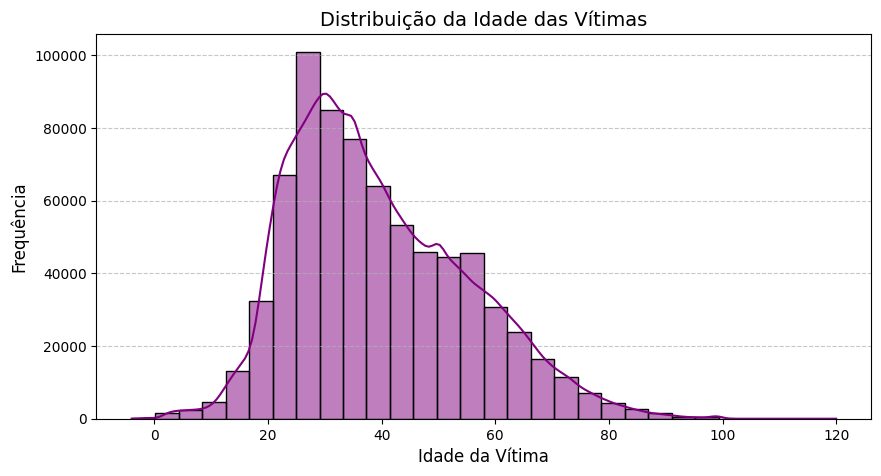

In [103]:
# histograma da idade das vítimas

plt.figure(figsize=(10,5))
sns.histplot(filtered_df['Vict Age'].dropna(), bins=30, kde=True, color="purple")

plt.title("Distribuição da Idade das Vítimas", fontsize=14)
plt.xlabel("Idade da Vítima", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [104]:
from scipy.stats import skew

# Calcular métricas
media_idade = filtered_df['Vict Age'].mean()
desvio_padrao_idade = filtered_df['Vict Age'].std()
assimetria_idade = skew(filtered_df['Vict Age'].dropna())  # Remover valores nulos antes de calcular

print(f"Média da idade das vítimas: {media_idade:.2f}")
print(f"Desvio padrão da idade das vítimas: {desvio_padrao_idade:.2f}")
print(f"Assimetria da idade das vítimas: {assimetria_idade:.2f}")

Média da idade das vítimas: 39.50
Desvio padrão da idade das vítimas: 15.58
Assimetria da idade das vítimas: 0.61


### Distribuição Geográfica dos Crimes

Regiões com mais crimes

In [105]:
crimes_por_area = df['AREA NAME'].value_counts().head(10)

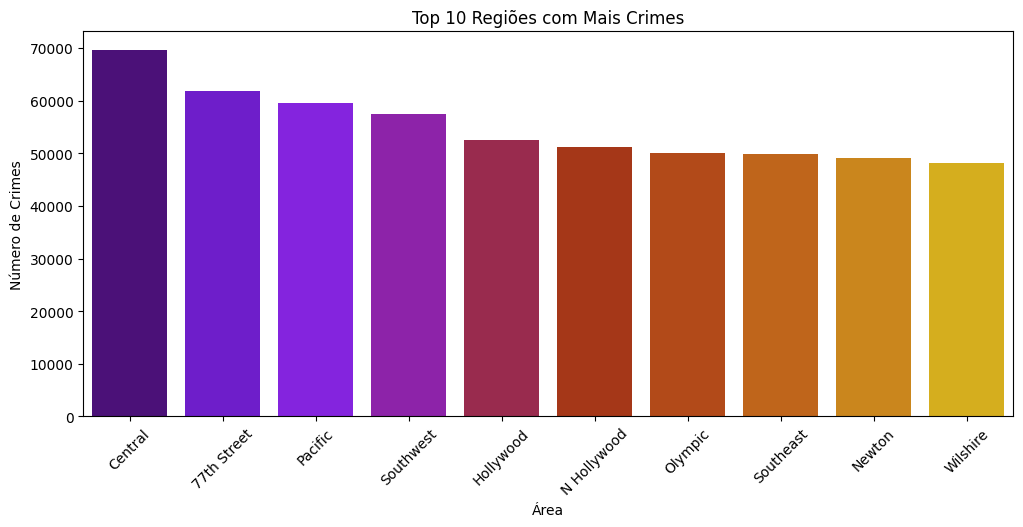

In [106]:
# Criar gráfico de barras
plt.figure(figsize=(12,5))
sns.barplot(x=crimes_por_area.index, y=crimes_por_area.values,hue= crimes_por_area.index ,palette="gnuplot")

plt.title("Top 10 Regiões com Mais Crimes")
plt.xlabel("Área")
plt.ylabel("Número de Crimes")
plt.xticks(rotation=45)
plt.show()

In [107]:
df[['LON','LAT']]

,LON,LAT
0,-118.3506,34.0375
1,-118.2628,34.0444
2,-118.3002,34.0210
3,-118.4387,34.1576
4,-118.2130,34.0820
...,...,...
1005099,-118.2794,34.0270
1005100,-118.6103,34.2128
1005101,-118.2895,34.0212
1005102,-118.2923,34.0307


In [108]:
df2 = df[(df['LON'] < -117) & (df['LON'] > -119)]
df2 = df[(df['LAT'] > 33) & (df['LAT'] < 35)]

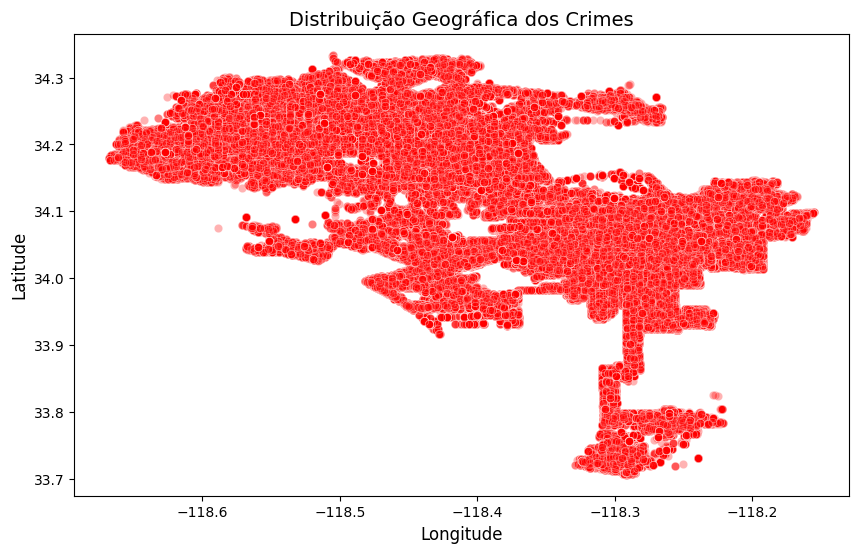

In [109]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2['LON'], y=df2['LAT'], alpha=0.3, color="red")

plt.title("Distribuição Geográfica dos Crimes", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()

In [110]:
import folium
from folium.plugins import HeatMap

In [111]:
# Criar o mapa
m = folium.Map(location=[34.05, -118.25], zoom_start=11)

In [112]:
# Criar os dados para o Heatmap
heat_data = df2[['LAT', 'LON']].dropna().values.tolist()

In [113]:
# Adicionar ao mapa
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

# Exibir o mapa
m

### Crime por bairro ou distrito

In [114]:
df_bairros = df.groupby('AREA NAME').size().reset_index(name='quantidade_crimes')

# Ordenando os bairros por maior número de crimes
df_bairros = df_bairros.sort_values(by='quantidade_crimes', ascending=False)

# Exibir os 10 bairros mais perigosos
print(df_bairros.head(10))

In [115]:
df['AREA NAME'].value_counts().plot(kind='bar', title="Crimes por Bairro")

## Pré-processamento

### remover colunas irrelevantes

In [116]:
df_mo = df.copy()

In [117]:
df_mo.drop(columns=['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC','AREA NAME','Rpt Dist No','Crm Cd', 'Crm Cd Desc', 'Part 1-2',
                 'Mocodes', 'Premis Desc', 'Weapon Desc', 'LOCATION', 'Cross Street','Weapon Used Cd','Crm Cd 1','Crm Cd 2',
                  'Crm Cd 3', 'Crm Cd 4','Status Desc','Vict Sex', 'Vict Descent', 'HORA_FORMATADA', 'ano_mes'],
        inplace=True, errors='ignore')

In [118]:
df_mo.info()

In [119]:
df_mo.head()

### tratamento da coluna Vict Age
primeira abordagem: Remover todas as linhas onde Vict Age == 0

In [120]:
df_mo[df_mo['Vict Age']== 0]

In [ ]:
# Passo 1: Calcular a mediana das idades válidas (excluindo zeros)
median_age = df_mo[df_mo['Vict Age'] > 0]['Vict Age'].median()

In [ ]:
# Passo 2: Substituir os zeros pela mediana
df_mo['Vict Age'] = df_mo['Vict Age'].replace(0, median_age)

In [ ]:
df_mo.shape

###  Tratar valores ausentes (Premis Cd e Status)

In [ ]:
# Preenchendo valores ausentes na coluna 'Premis Cd' com a moda
df_mo.loc[:, 'Premis Cd'] = df_mo['Premis Cd'].fillna(df_mo['Premis Cd'].mode()[0])

# Preenchendo valores ausentes na coluna 'Status' com a moda
df_mo.loc[:, 'Status'] = df_mo['Status'].fillna(df_mo['Status'].mode()[0])

### Transformar variáveis categóricas em numéricas
Label Encoding (para Árvore de Decisão e Random Forest)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Status', 'DIA_SEMANA', 'PERIODO_DIA']:
    df_mo[col] = le.fit_transform(df_mo[col])

## Treinamento do Modelo

### Separar os dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

# Definir X (features) e y (variável alvo)
X = df_mo.drop(columns=['Crm Cd Grouped'])
y = df_mo['Crm Cd Grouped']

In [ ]:
# Dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

## implementação dos modelos

 Árvore de Decisão e Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

### Treinar o modelo de Árvore de Decisão

In [ ]:
# Criar e treinar o modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

In [ ]:
# Fazer previsões
y_pred_tree = tree_model.predict(X_test)

In [ ]:
# Acuracia
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Acuracia (Árvore de Decisão):", accuracy_tree)

In [ ]:
# Relatório de classificação (precisão, recall, F1-score por classe)
print("Relatório de Classificação (Árvore de Decisão):\n", classification_report(y_test, y_pred_tree))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# Precisão, Recall e F1-score (médias macro e weighted)
precision_macro_tree = precision_score(y_test, y_pred_tree, average='macro')
recall_macro_tree = recall_score(y_test, y_pred_tree, average='macro')
f1_macro_tree = f1_score(y_test, y_pred_tree, average='macro')

precision_weighted_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_weighted_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_weighted_tree = f1_score(y_test, y_pred_tree, average='weighted')

print("Precisão (Macro - Árvore de Decisão):", precision_macro_tree)
print("Recall (Macro - Árvore de Decisão):", recall_macro_tree)
print("F1-score (Macro - Árvore de Decisão):", f1_macro_tree)
print("Precisão (Weighted - Árvore de Decisão):", precision_weighted_tree)
print("Recall (Weighted - Árvore de Decisão):", recall_weighted_tree)
print("F1-score (Weighted - Árvore de Decisão):", f1_weighted_tree)

### Ajuste de hiperparâmetros: Árvore de Decisão

In [ ]:
from scipy.stats import randint

# Definir hiperparâmetros com distribuições aleatórias
param_dist = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}


In [ ]:
# Criar RandomizedSearchCV
random_search = RandomizedSearchCV(tree_model, param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)

In [ ]:
# Rodar RandomizedSearchCV
random_search.fit(X_train, y_train)

In [ ]:
# Melhor combinação de hiperparâmetros
melhores_parametros_dt = random_search.best_params_
print(melhores_parametros_dt)

In [ ]:
# Melhor modelo encontrado
best_model_random = random_search.best_estimator_

In [ ]:
# Avaliar no conjunto de teste
y_pred_random = best_model_random.predict(X_test)
print(f"Acurácia após RandomizedSearchCV: {accuracy_score(y_test, y_pred_random):.4f}")

### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Criando um modelo Random Forest usando os melhores parâmetros da Árvore de Decisão
modelo_rf = RandomForestClassifier(
    n_estimators=100,  # Número de árvores na floresta
    max_depth=melhores_parametros_dt['max_depth'],
    min_samples_split=melhores_parametros_dt['min_samples_split'],
    min_samples_leaf=melhores_parametros_dt['min_samples_leaf'],
    criterion=melhores_parametros_dt['criterion'],
    random_state=42
)

# Treinando o modelo
modelo_rf.fit(X_train, y_train)

In [ ]:
# Fazer previsões
y_pred_rf = modelo_rf.predict(X_test)

In [ ]:
# Avaliar acurácia
print(f"Acurácia Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")

### Metricas

In [ ]:
# Função para calcular métricas e retornar um DataFrame
def calculate_metrics(y_true, y_pred, model_name, average='weighted', binary=False):
    # Métricas básicas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average, zero_division=0)
    recall = recall_score(y_true, y_pred, average=average, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average, zero_division=0)

    # Criar um dicionário com as métricas
    metrics_dict = {
        'Modelo': model_name,
        'Acurácia': accuracy,
        'Precisão': precision,
        'Recall': recall,
        'F1-score': f1
    }

    # Converter o dicionário em um DataFrame
    metrics_df = pd.DataFrame([metrics_dict])
    return metrics_df

In [ ]:
metrics_tree = calculate_metrics(y_test, y_pred_tree, "Árvore de Decisão")

In [ ]:
metrics_tree_adjusted = calculate_metrics(y_test, y_pred_random, "Árvore de Decisão (ajustado)")

In [ ]:
metrics_forest = calculate_metrics(y_test, y_pred_rf, "Random Forest")

In [ ]:
results_df = pd.concat([metrics_tree,metrics_tree_adjusted, metrics_forest], ignore_index=True)
results_df

Modelo Final Escolhido: **Random Forest**

Justificativa:

* Maior acurácia (erra menos no geral).
* Maior recall (identifica mais crimes corretamente).
* Maior precisão (suas previsões são mais confiáveis).
* Mais robusto e generalizável que Árvores de Decisão individuais.

### Melhorias e Ajustes Futuros

1. Ajustar hiperparâmetros do Random Forest novamente
2. Criar novas features
3. Testar XGBoost

## Conclusão
O modelo escolhido para a classificação dos crimes foi o Random Forest, pois apresentou a maior acurácia (38.79%), melhor recall (38.79%) e maior precisão (37.94%), superando a Árvore de Decisão simples e ajustada. Esses resultados indicam que o modelo tem boa capacidade de generalização e é mais robusto na previsão das categorias de crimes.

Embora a acurácia esteja abaixo de 50%, esse desempenho é esperado para problemas complexos e multiclasse, como a classificação de crimes. O modelo pode ser útil para identificar padrões de criminalidade, ajudando autoridades a alocar recursos de segurança de forma mais eficiente e prever tendências de crimes em determinadas regiões e horários.

**Implicações práticas da utilização do modelo**
* Apoio à segurança pública -> O modelo pode ser utilizado para antecipar áreas de risco e definir estratégias preventivas.
* Planejamento policial -> Permite otimizar a distribuição de patrulhas com base nos padrões identificados.
* Monitoramento de tendências criminais -> Pode auxiliar na identificação de períodos e locais com maior incidência de crimes específicos.
---
Limitações e possíveis melhorias: O modelo pode ser aprimorado com engenharia de features mais avançada e ajustes adicionais nos hiperparâmetros. Além disso, testar modelos de boosting como XGBoost pode trazer melhorias no desempenho.
<br><br>
 **Conclusão final:** O modelo atende parcialmente às expectativas iniciais, sendo útil para análises preditivas de crimes, mas ainda pode ser refinado para aumentar sua precisão e aplicabilidade prática.